In [58]:
from wordcloud import WordCloud # 워드클라우드 제작 라이브러리
import pandas as pd # 데이터 프레임 라이브러리
import numpy as np # 행렬 라이브러리
import matplotlib.pyplot as plt # 워드클라우드 시각화 라이브러리

In [59]:
# 농구화 wordcloud
df=pd.read_csv("../crawling_csv/basketball_reviews_final.csv",encoding='utf-8-sig')
df.head()

,Product,Review 1,Review 2,Review 3,Review 4,Review 5,Review 6,Review 7,Review 8,Review 9,...,Review 101,Review 102,Review 103,Review 104,Review 105,Review 106,Review 107,Review 108,Review 109,Review 110
0,루카 3 PF,농민화로 구입신제품 색상발목 잘 잡아주고뭉퉁한 편 가볍고 푹신본드접합 뽑기운 있음맥...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,자이언 3 PF '리퀴드 메탈',멋있어서 샀는데 출퇴근용으론 산고벗기가 불편해서 힘들것 같고 운동할때 좋을것 같네요,피팅감이 완벽함.실물로 봤을때 색상이 완벽 그자체임.사이드 스탭시 전혀 밀리지 않는...,발목이 좋지 않아서 웨이트 할때 농구화를 이용합나다.자이언3는 코비처럼 발 전체를 ...,"평소 나이키 270신는데, 이 농구화도 270으로 주문했습니다. 발길이 딱맞고, 평...",난 발볼과 발등이 쫌 있는편임. 하지만 사이즈가 없어서 260을 구매하게됨. 솔직하...,코비8의 베이스 느낌 아웃솔이나 접지플레이 중간중간 손으로 먼지 한번씩만 쓸어내면 ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,북 1 EP '할로윈',"디자인,피팅,접지,쿠션 나무랄데없는 모델입니다. 가격도 합리적이고 괜찮은 선택이네요...",리뷰보고 정사이즈를 사야하나..반업을 해야하나 고민을 많이 했는데결국 반업해서 주문...,개인적으로 올해 최고의농구화 입니다. 접지 피팅 다만적스럽습니다. 다만 쿠션이 조금...,"실물이 너무 이쁘네요.........발도 편안하고,,,,,,접지가 너무 좋습니다.....",정사이즈 편하게 잘맞아요뒷 줌 잘 느껴지고앞쿠션은 쏘쏘접지는 굿,실제가 더 이쁘네요. 겉감도 고급스럽고 잘 신을 것 같습니다.,플레이뿐 아니라 일상용으로도 충분할 것 같은 디자인이라 선택했어요농구 하는날 내내 ...,"우선 할로윈 버전 구매했고, 아웃솔은 야광입니다. 지상고가 높은 착화감이나, 안정적...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,조던 에어(Heir) 시리즈 PF '화이트/블랙 볼트',솔직 리뷰 ㅋㅋ 배송 겁나 빠룸가성비 쵝오 갑최근 구매한 밧슈 중 베스트오브베스트신...,가벼워보이지만 발울 넣었을때 상당히 탄탄하고 안정감이 있습니다아웃솔 접지도 괜찮고 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,조던 원 테이크 5 PF,평소 사이즈: 285 / 주문 사이즈: 295착용감: 앞부분이 단단히 고정되어 많이...,꽉껴서 안에 고무? 가위로 자름 신발끈은 장식품일뿐 그이상 그이하도 아니다,쫀쫀하고 매우 단단하다.일단 로우탑 농구화 치고는 상당히 무거운편입니다.이유는 XD...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# 리뷰 합치기
cols=[]
for i in range(110):
    cols.append(f'Review {i+1}')

df['review_combined'] =df[cols].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
df['review_combined']

0     농민화로 구입신제품 색상발목 잘 잡아주고뭉퉁한 편 가볍고 푹신본드접합 뽑기운 있음맥...
1     멋있어서 샀는데 출퇴근용으론 산고벗기가 불편해서 힘들것 같고 운동할때 좋을것 같네요...
2     디자인,피팅,접지,쿠션 나무랄데없는 모델입니다. 가격도 합리적이고 괜찮은 선택이네요...
3     솔직 리뷰 ㅋㅋ 배송 겁나 빠룸가성비 쵝오 갑최근 구매한 밧슈 중 베스트오브베스트신...
4     평소 사이즈: 285 / 주문 사이즈: 295착용감: 앞부분이 단단히 고정되어 많이...
                            ...                        
17    컬러 쿠션 다 좋은데 발볼이 지옥임무조건 사이즈업 추천해요,신발 예뻐요 쿠션도 좋은...
18    #멤버데이즈리뷰이벤트생각한것보다 사이즈랑 기능 모두 너무 좋았습니다,정말 가성비 짱...
19    레거시 312  두번째 구매입니다22년 시카고하고 멤버데이즈 때 19년시카고색상은 ...
20    사이즈는 정사이즈 신으시면 되구요, 쿠션감은 음..확실히 저가 조던은 농구용은 아닌...
21    매장에서 시착했을때와 다르게, 훨씬좋네요^^배송도 빠르고 사이즈는 정사이즈면 될것같...
Name: review_combined, Length: 22, dtype: object

In [61]:
# 한글 제외 모든 문자 제거
df['review_combined'] = df['review_combined'].str.replace('[^가-힣]', ' ', regex = True)
df['review_combined']

0     농민화로 구입신제품 색상발목 잘 잡아주고뭉퉁한 편 가볍고 푹신본드접합 뽑기운 있음맥...
1     멋있어서 샀는데 출퇴근용으론 산고벗기가 불편해서 힘들것 같고 운동할때 좋을것 같네요...
2     디자인 피팅 접지 쿠션 나무랄데없는 모델입니다  가격도 합리적이고 괜찮은 선택이네요...
3     솔직 리뷰    배송 겁나 빠룸가성비 쵝오 갑최근 구매한 밧슈 중 베스트오브베스트신...
4     평소 사이즈        주문 사이즈     착용감  앞부분이 단단히 고정되어 많이...
                            ...                        
17    컬러 쿠션 다 좋은데 발볼이 지옥임무조건 사이즈업 추천해요 신발 예뻐요 쿠션도 좋은...
18     멤버데이즈리뷰이벤트생각한것보다 사이즈랑 기능 모두 너무 좋았습니다 정말 가성비 짱...
19    레거시      두번째 구매입니다  년 시카고하고 멤버데이즈 때   년시카고색상은 ...
20    사이즈는 정사이즈 신으시면 되구요  쿠션감은 음  확실히 저가 조던은 농구용은 아닌...
21    매장에서 시착했을때와 다르게  훨씬좋네요  배송도 빠르고 사이즈는 정사이즈면 될것같...
Name: review_combined, Length: 22, dtype: object

In [62]:
# Kkma 사용
import konlpy
kkma = konlpy.tag.Kkma() #형태소 분석기 꼬꼬마(Kkma)

nouns = df['review_combined'].apply(kkma.nouns)
nouns

0     [농민, 구입, 구입신제품, 신제품, 색상, 색상발목, 발목, 뭉, 편, 신, 신본...
1     [출퇴근, 산고, 불편, 운동, 때, 피팅, 피팅감이, 감이, 완벽, 실물, 색상,...
2     [디자인, 피팅, 접지, 쿠션, 데, 모델, 가격, 합리적, 선택, 사, 사이즈, ...
3     [솔, 솔직, 직, 리뷰, 배송, 빠룸, 성비, 쵝, 쵝오, 오, 갑, 갑최근, 최...
4     [평소, 사이즈, 주문, 착용, 앞, 앞부분, 부분, 고정, 타이트, 타이트함, 함...
                            ...                        
17    [컬러, 쿠션, 발, 발볼, 볼, 지옥, 지옥임무조건, 임무, 조건, 사이즈, 사이...
18    [데, 멤버, 리뷰, 생각, 이벤트, 데이즈, 이즈, 사이즈, 기능, 성비, 짱, ...
19    [레, 레거시, 거시, 번째, 구매, 시카고, 멤버, 멤버데이즈, 데, 이즈, 때,...
20    [사이즈, 정, 정사이즈, 쿠션, 쿠션감, 감, 저, 조, 조던, 던, 농구, 거,...
21    [매장, 시, 때, 배, 배송도, 송도, 사이즈, 정, 정사이즈, 성비, 대비, 가...
Name: review_combined, Length: 22, dtype: object

In [63]:
nouns = nouns.explode()
nouns

0        농민
0        구입
0     구입신제품
0       신제품
0        색상
      ...  
21      어두움
21    어두움흰색
21       흰색
21        줄
21      시멘트
Name: review_combined, Length: 1796, dtype: object

In [64]:
# pd.set_option('display.max_rows', None)  # 최대 행 수 제한 해제
pd.set_option('display.max_rows', 10) # 10행으로 제한

df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2') # 글자수 2개 이상 가져오기
df_word

,word,count
0,농민,2
0,구입,2
0,구입신제품,5
0,신제품,3
0,색상,2
...,...,...
21,밑창,2
21,어두움,3
21,어두움흰색,5
21,흰색,2


In [65]:
df_word=df_word.groupby('word',as_index=False).count().sort_values('count', ascending = False)
df_word

,word,count
330,사이즈,18
571,접지,13
582,정사이즈,12
127,농구화,11
687,쿠션,11
...,...,...
294,베스트오브,1
295,베이스,1
296,벨크,1
298,보스,1


In [66]:
# 워드 클라우드 만들기
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

{'사이즈': 18,
 '접지': 13,
 '정사이즈': 12,
 '농구화': 11,
 '쿠션': 11,
 '피팅': 11,
 '생각': 11,
 '구매': 10,
 '느낌': 10,
 '리뷰': 10,
 '이즈': 9,
 '추천': 9,
 '처음': 9,
 '발볼': 9,
 '가격': 8,
 '신발': 8,
 '디자인': 8,
 '신어': 7,
 '만족': 7,
 '착용': 7,
 '부분': 7,
 '지상': 7,
 '플레이': 6,
 '발등': 6,
 '발목': 6,
 '보고': 6,
 '길이': 6,
 '정도': 6,
 '멤버': 5,
 '불편': 5,
 '반업': 5,
 '주문': 5,
 '이상': 5,
 '다운': 5,
 '신고': 5,
 '편안': 5,
 '양말': 5,
 '최고': 5,
 '하나': 5,
 '착화': 5,
 '농구': 5,
 '어퍼': 5,
 '사람': 5,
 '운동': 4,
 '아웃솔': 4,
 '맥스': 4,
 '지상고가': 4,
 '착화감': 4,
 '평소': 4,
 '업해': 4,
 '가격대비': 4,
 '때문': 4,
 '제가': 4,
 '구입': 4,
 '실물': 4,
 '스타일': 4,
 '리뷰보고': 4,
 '기준': 4,
 '쿠션감': 4,
 '데이즈': 4,
 '개인적': 4,
 '대비': 4,
 '이벤트': 4,
 '컬러': 4,
 '고가': 4,
 '하다': 4,
 '성비': 4,
 '감이': 4,
 '여유': 3,
 '앞부분': 3,
 '쿠셔닝': 3,
 '코비': 3,
 '완전': 3,
 '라인': 3,
 '착화감도': 3,
 '오늘': 3,
 '안정감': 3,
 '앞쪽': 3,
 '색상': 3,
 '리뷰이벤트': 3,
 '발볼러': 3,
 '일반': 3,
 '선택': 3,
 '있음': 3,
 '자체': 3,
 '부족': 3,
 '전반적': 3,
 '전체적': 3,
 '버전': 3,
 '배송': 3,
 '점프': 3,
 '의견': 3,
 '진짜': 3,
 '나이키': 3,
 '스포츠': 3,
 '반업해': 

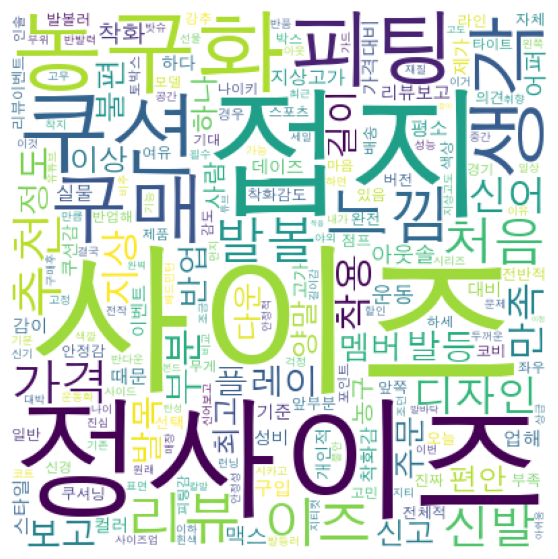

In [67]:
wc = WordCloud(random_state = 123, font_path = 'AppleGothic', width = 400,
               height = 400, background_color = 'white')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (7, 7))
plt.axis('off')
plt.imshow(img_wordcloud)
plt.savefig('basketball_wordcloud.png')

In [68]:
# Okt 사용
okt=Okt()
nouns_okt = df['review_combined'].apply(okt.nouns)
nouns_okt

0     [농민, 화로, 구입, 신제품, 색상, 발목, 뭉퉁, 편, 본드, 접합, 맥스, 신...
1     [출퇴근, 용, 산고, 운동, 때, 피팅, 감, 실물, 때, 색상, 완벽, 자체, ...
2     [디자인, 피팅, 접지, 쿠션, 모델, 가격, 합리, 선택, 사이즈, 길이, 조금,...
3     [솔직, 리뷰, 배송, 빠룸, 성비, 쵝오, 갑, 최근, 구매, 밧슈, 중, 베스트...
4     [평소, 사이즈, 주문, 사이즈, 착용, 감, 앞, 부분, 고정, 타이, 트함, 발...
                            ...                        
17    [컬러, 쿠션, 발볼, 지옥, 임무, 조건, 사이즈, 업, 추천, 신발, 쿠션, 발...
18    [멤버, 데이즈, 리뷰, 이벤트, 생각, 것, 사이즈, 기능, 모두, 정말, 가성,...
19    [레거시, 두번째, 구매, 년, 시카고, 멤버, 데이즈, 때, 년, 시카고, 색상,...
20    [사이즈, 정사, 이즈, 쿠션, 음, 저가, 조던, 농구, 상용, 패션, 용, 것,...
21    [매장, 시, 때, 배송, 사이즈, 정사, 이즈, 가성, 비, 대비, 정말, 가격,...
Name: review_combined, Length: 22, dtype: object

In [69]:
nouns_okt = nouns_okt.explode()
nouns_okt

0      농민
0      화로
0      구입
0     신제품
0      색상
     ... 
21      움
21     흰색
21      줄
21    시멘트
21     색임
Name: review_combined, Length: 2244, dtype: object

In [70]:
df_word_okt = pd.DataFrame({'word' : nouns_okt})
df_word_okt['count'] = df_word_okt['word'].str.len()
df_word_okt = df_word_okt.query('count >= 2') # 글자수 2개 이상 가져오기
df_word_okt

,word,count
0,농민,2
0,화로,2
0,구입,2
0,신제품,3
0,색상,2
...,...,...
21,생각,2
21,밑창,2
21,흰색,2
21,시멘트,3


In [71]:
df_word_okt=df_word_okt.groupby('word',as_index=False).count().sort_values('count', ascending = False)
df_word_okt

,word,count
265,사이즈,42
420,이즈,33
468,정사,32
547,쿠션,32
90,농구,30
...,...,...
300,솔직,1
62,그이,1
297,소재,1
296,소비자,1


In [72]:
# 워드 클라우드 만들기
dic_word_okt = df_word_okt.set_index('word').to_dict()['count']
dic_word_okt

{'사이즈': 42,
 '이즈': 33,
 '정사': 32,
 '쿠션': 32,
 '농구': 30,
 '구매': 27,
 '발볼': 26,
 '신발': 25,
 '디자인': 24,
 '접지': 22,
 '시카고': 20,
 '신어': 19,
 '느낌': 18,
 '조던': 17,
 '생각': 17,
 '피팅': 17,
 '리뷰': 16,
 '정말': 15,
 '발등': 15,
 '부분': 14,
 '추천': 13,
 '컬러': 13,
 '길이': 12,
 '보고': 12,
 '아주': 12,
 '양말': 12,
 '조금': 12,
 '정도': 11,
 '발목': 11,
 '신고': 11,
 '가격': 11,
 '처음': 11,
 '진짜': 11,
 '최고': 10,
 '실물': 10,
 '착용': 10,
 '살짝': 10,
 '플레이': 9,
 '주문': 9,
 '제품': 9,
 '사람': 9,
 '개인': 9,
 '지상': 9,
 '멤버': 8,
 '완전': 8,
 '매우': 8,
 '로우': 8,
 '레거시': 8,
 '다운': 8,
 '그냥': 7,
 '데이즈': 7,
 '다만': 7,
 '구입': 7,
 '운동': 7,
 '대비': 6,
 '스타일': 6,
 '점프': 6,
 '나이키': 6,
 '모두': 6,
 '색상': 6,
 '코비': 6,
 '마음': 6,
 '크게': 6,
 '평소': 6,
 '가성': 6,
 '포인트': 6,
 '인솔': 5,
 '처럼': 5,
 '편이': 5,
 '듭니': 5,
 '전체': 5,
 '아웃': 5,
 '기준': 5,
 '이벤트': 5,
 '약간': 5,
 '여유': 5,
 '오늘': 5,
 '선택': 5,
 '고가': 5,
 '이상': 5,
 '안정': 4,
 '움직임': 4,
 '하나': 4,
 '안정감': 4,
 '어퍼': 4,
 '때문': 4,
 '배송': 4,
 '배드민턴': 4,
 '편안함': 4,
 '시리즈': 4,
 '솔이': 4,
 '만족': 4,
 '쿠셔닝': 4,
 '성능': 4,
 '매장':

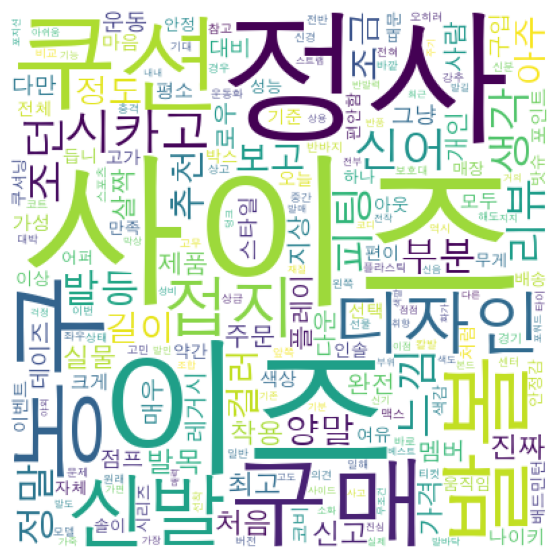

In [73]:
wc_okt = WordCloud(random_state = 123, font_path = 'AppleGothic', width = 400,
               height = 400, background_color = 'white')

img_wordcloud_okt = wc_okt.generate_from_frequencies(dic_word_okt)

plt.figure(figsize = (7, 7))
plt.axis('off')
plt.imshow(img_wordcloud_okt)